In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [19]:
df=pd.read_csv("/content/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
house_hp=pd.DataFrame(df)

In [21]:
house_hp.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [22]:
house_hp.drop(["Address"],axis="columns",inplace=True)
house_hp.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [23]:
#drop Area population
house_hp.drop(["Area Population"],axis="columns",inplace=True)


In [24]:
house_hp.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price
0,79545.458574,5.682861,7.009188,4.09,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,6.309435e+05


In [26]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [28]:
x=house_hp[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms']]
y=house_hp["Price"]

In [38]:
#train and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [39]:
len(x_train)

3500

In [40]:
len(x_test)

1500

In [41]:
len(y_train)

3500

In [42]:
x_train[:4]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms
2318,66138.172820,5.446191,7.177924,4.42
3582,71778.026176,5.921280,7.411045,4.00
2251,66098.570723,5.875820,6.586904,2.13
4914,79064.683273,5.256405,6.450725,3.02


In [43]:
y_train[:4]

2318    1.155753e+06
3582    1.404622e+06
2251    1.040377e+06
4914    1.261761e+06
Name: Price, dtype: float64

In [44]:
#import model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg.score(x_test,y_test)

0.7209110628941605

In [47]:
y_predicted=reg.predict(x_test)

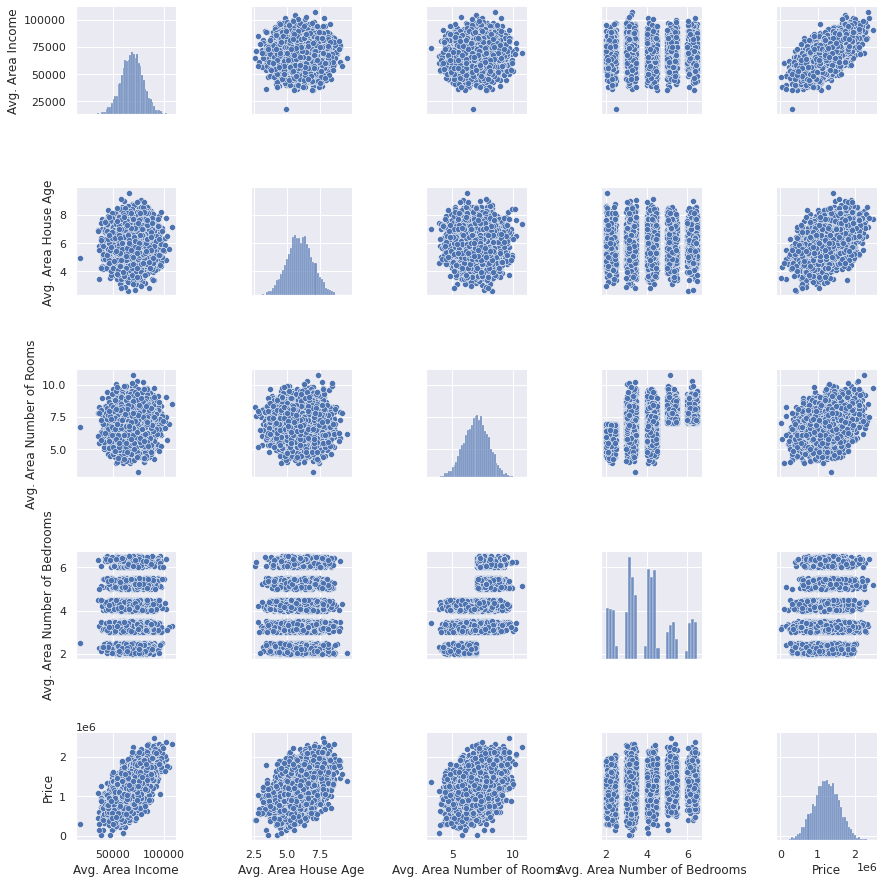

In [54]:
sns.pairplot(house_hp)

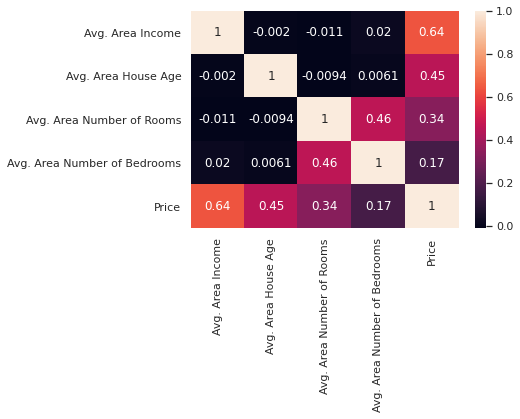

In [53]:
sns.heatmap(house_hp.corr(),annot=True)

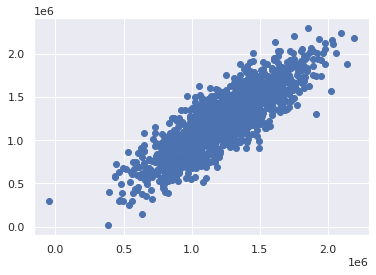

In [55]:
plt.scatter(y_predicted,y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


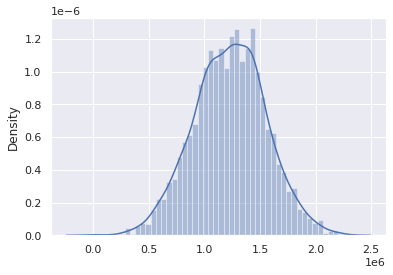

In [56]:
sns.distplot((y_predicted,y_test),bins=50)

In [57]:
print(reg.intercept_)

-2053633.1350881744


In [64]:
from sklearn import metrics

In [58]:
import numpy as np

In [65]:
print("MAE:",metrics.mean_absolute_error(y_predicted,y_test))

MAE: 148322.20506171373


In [66]:
print("MSE:",metrics.mean_squared_error(y_predicted,y_test))

MSE: 34336512001.269814


In [67]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_predicted,y_test)))

RMSE: 185301.13869393736


In [71]:
#predict some of values
y_test.head(10)

3724    6.150557e+05
445     1.468513e+06
4451    2.531857e+05
136     1.172386e+06
1100    1.582140e+06
4724    1.433494e+06
4316    9.969964e+05
479     8.594280e+05
196     7.493831e+05
722     1.251664e+06
Name: Price, dtype: float64

In [70]:
y_predicted[:10]

array([ 801844.50801281, 1444663.74049875,  542143.69551414,
       1256844.62907117, 1744213.3350466 , 1300626.397121  ,
       1113432.87952313, 1070738.46436725, 1034826.18367526,
       1070572.85811012])